In [2]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

import matplotlib.pyplot as plt
import seaborn as sns

# problem statement

To predict price of car using various parameters

# Data Gathering


In [4]:
df=pd.read_csv("autos_dataset.csv")
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


In [10]:
df.head().T

,0,1,2,3,4
symboling,3,3,1,2,2
normalized-losses,?,?,?,164,164
make,alfa-romero,alfa-romero,alfa-romero,audi,audi
fuel-type,gas,gas,gas,gas,gas
aspiration,std,std,std,std,std
num-of-doors,two,two,two,four,four
body-style,convertible,convertible,hatchback,sedan,sedan
drive-wheels,rwd,rwd,rwd,fwd,4wd
engine-location,0,0,0,0,0
wheel-base,88.6,88.6,94.5,99.8,99.4


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    int64  
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

# EDA and Featuring engineering

## 1 symboling

In [12]:
df["symboling"]

0      3
1      3
2      1
3      2
4      2
      ..
200   -1
201   -1
202   -1
203   -1
204   -1
Name: symboling, Length: 205, dtype: int64

## 2 normalized-losses

In [13]:
df["normalized-losses"]

0        ?
1        ?
2        ?
3      164
4      164
      ... 
200     95
201     95
202     95
203     95
204     95
Name: normalized-losses, Length: 205, dtype: object

In [14]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [ ]:
# replace the ? in null value

In [15]:
df.replace({"?" : np.nan} ,inplace=True)


In [16]:
df.isna().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [ ]:
# mean >> No outliers (Continuous)
# median >> outliers (Continuous) 
# mode >> Categorical data

In [17]:
df["normalized-losses"]

0      NaN
1      NaN
2      NaN
3      164
4      164
      ... 
200     95
201     95
202     95
203     95
204     95
Name: normalized-losses, Length: 205, dtype: object

In [ ]:
# change the object data type into numerical(float) >> by using astype function


In [18]:
df["normalized-losses"]=df["normalized-losses"].astype(float)


In [19]:
df["normalized-losses"]

0        NaN
1        NaN
2        NaN
3      164.0
4      164.0
       ...  
200     95.0
201     95.0
202     95.0
203     95.0
204     95.0
Name: normalized-losses, Length: 205, dtype: float64

In [ ]:
#  fill the null value by using .fillna function

In [20]:
df["normalized-losses"]=df["normalized-losses"].fillna(df["normalized-losses"].median())


In [21]:
df["normalized-losses"]

0      115.0
1      115.0
2      115.0
3      164.0
4      164.0
       ...  
200     95.0
201     95.0
202     95.0
203     95.0
204     95.0
Name: normalized-losses, Length: 205, dtype: float64

In [22]:
df["normalized-losses"].isna().sum()

0

## 3 make 

In [23]:
df["make"]

0      alfa-romero
1      alfa-romero
2      alfa-romero
3             audi
4             audi
          ...     
200          volvo
201          volvo
202          volvo
203          volvo
204          volvo
Name: make, Length: 205, dtype: object

In [24]:
df["make"].value_counts()

toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
volkswagen       12
subaru           12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
audi              7
plymouth          7
saab              6
porsche           5
isuzu             4
jaguar            3
chevrolet         3
alfa-romero       3
renault           2
mercury           1
Name: make, dtype: int64

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    int64  
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [78]:
df=pd.get_dummies(df,columns=["make"])
df

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,drive-wheels,engine-location,wheel-base,length,width,...,make_nissan,make_peugot,make_plymouth,make_porsche,make_renault,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo
0,3,115.0,0,0,2,rwd,0,88.6,168.8,64.1,...,0,0,0,0,0,0,0,0,0,0
1,3,115.0,0,0,2,rwd,0,88.6,168.8,64.1,...,0,0,0,0,0,0,0,0,0,0
2,1,115.0,0,0,2,rwd,0,94.5,171.2,65.5,...,0,0,0,0,0,0,0,0,0,0
3,2,164.0,0,0,4,fwd,0,99.8,176.6,66.2,...,0,0,0,0,0,0,0,0,0,0
4,2,164.0,0,0,4,4wd,0,99.4,176.6,66.4,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,0,0,4,rwd,0,109.1,188.8,68.9,...,0,0,0,0,0,0,0,0,0,1
201,-1,95.0,0,1,4,rwd,0,109.1,188.8,68.8,...,0,0,0,0,0,0,0,0,0,1
202,-1,95.0,0,0,4,rwd,0,109.1,188.8,68.9,...,0,0,0,0,0,0,0,0,0,1
203,-1,95.0,1,1,4,rwd,0,109.1,188.8,68.9,...,0,0,0,0,0,0,0,0,0,1


## 4 fuel-type 

In [26]:
df["fuel-type"]

0         gas
1         gas
2         gas
3         gas
4         gas
        ...  
200       gas
201       gas
202       gas
203    diesel
204       gas
Name: fuel-type, Length: 205, dtype: object

In [27]:
df["fuel-type"].value_counts()

gas       185
diesel     20
Name: fuel-type, dtype: int64

In [28]:
df["fuel-type"].replace({"gas" : 0 , "diesel" : 1},inplace=True)

In [29]:
df["fuel-type"].value_counts().to_dict()

{0: 185, 1: 20}

In [30]:
df.isna().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         2
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 4
stroke               4
compression-ratio    0
horsepower           2
peak-rpm             2
city-mpg             0
highway-mpg          0
price                4
dtype: int64

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    int64  
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    int64  
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

## 5 aspiration

In [32]:
df["aspiration"]

0        std
1        std
2        std
3        std
4        std
       ...  
200      std
201    turbo
202      std
203    turbo
204    turbo
Name: aspiration, Length: 205, dtype: object

In [33]:
df["aspiration"].value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

In [34]:
df["aspiration"].replace({"std" : 0, "turbo" : 1},inplace=True)


In [35]:
df["aspiration"].value_counts().to_dict()

{0: 168, 1: 37}

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    int64  
 4   aspiration         205 non-null    int64  
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    int64  
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

##  6 num-of-doors

In [37]:
df["num-of-doors"]

0       two
1       two
2       two
3      four
4      four
       ... 
200    four
201    four
202    four
203    four
204    four
Name: num-of-doors, Length: 205, dtype: object

In [38]:
df["num-of-doors"].value_counts()

four    114
two      89
Name: num-of-doors, dtype: int64

In [39]:
df["num-of-doors"].isna().sum()

2

In [40]:
df["num-of-doors"]=df["num-of-doors"].fillna(df["num-of-doors"].mode()[0])

In [41]:
df["num-of-doors"].isna().sum()

0

In [42]:
df["num-of-doors"].replace({"four" : 4, "two" : 2},inplace=True)

In [43]:
df["num-of-doors"].value_counts().to_dict()

{4: 116, 2: 89}

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    int64  
 4   aspiration         205 non-null    int64  
 5   num-of-doors       205 non-null    int64  
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    int64  
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

##  7 body-style

In [45]:
df["body-style"]

0      convertible
1      convertible
2        hatchback
3            sedan
4            sedan
          ...     
200          sedan
201          sedan
202          sedan
203          sedan
204          sedan
Name: body-style, Length: 205, dtype: object

In [46]:
df["body-style"].value_counts().to_dict()

{'sedan': 96, 'hatchback': 70, 'wagon': 25, 'hardtop': 8, 'convertible': 6}

In [47]:
df["body-style"].isna().sum()

0

In [48]:
df=pd.get_dummies(df,columns=["body-style"])
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,drive-wheels,engine-location,wheel-base,length,...,horsepower,peak-rpm,city-mpg,highway-mpg,price,body-style_convertible,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon
0,3,115.0,alfa-romero,0,0,2,rwd,0,88.6,168.8,...,111,5000,21,27,13495,1,0,0,0,0
1,3,115.0,alfa-romero,0,0,2,rwd,0,88.6,168.8,...,111,5000,21,27,16500,1,0,0,0,0
2,1,115.0,alfa-romero,0,0,2,rwd,0,94.5,171.2,...,154,5000,19,26,16500,0,0,1,0,0
3,2,164.0,audi,0,0,4,fwd,0,99.8,176.6,...,102,5500,24,30,13950,0,0,0,1,0
4,2,164.0,audi,0,0,4,4wd,0,99.4,176.6,...,115,5500,18,22,17450,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,volvo,0,0,4,rwd,0,109.1,188.8,...,114,5400,23,28,16845,0,0,0,1,0
201,-1,95.0,volvo,0,1,4,rwd,0,109.1,188.8,...,160,5300,19,25,19045,0,0,0,1,0
202,-1,95.0,volvo,0,0,4,rwd,0,109.1,188.8,...,134,5500,18,23,21485,0,0,0,1,0
203,-1,95.0,volvo,1,1,4,rwd,0,109.1,188.8,...,106,4800,26,27,22470,0,0,0,1,0


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   symboling               205 non-null    int64  
 1   normalized-losses       205 non-null    float64
 2   make                    205 non-null    object 
 3   fuel-type               205 non-null    int64  
 4   aspiration              205 non-null    int64  
 5   num-of-doors            205 non-null    int64  
 6   drive-wheels            205 non-null    object 
 7   engine-location         205 non-null    int64  
 8   wheel-base              205 non-null    float64
 9   length                  205 non-null    float64
 10  width                   205 non-null    float64
 11  height                  205 non-null    float64
 12  curb-weight             205 non-null    int64  
 13  engine-type             205 non-null    object 
 14  num-of-cylinders        205 non-null    ob

##  8 drive-wheels 

In [50]:
df["drive-wheels"]

0      rwd
1      rwd
2      rwd
3      fwd
4      4wd
      ... 
200    rwd
201    rwd
202    rwd
203    rwd
204    rwd
Name: drive-wheels, Length: 205, dtype: object

In [51]:
df["drive-wheels"].value_counts()

fwd    120
rwd     76
4wd      9
Name: drive-wheels, dtype: int64

In [52]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   symboling               205 non-null    int64  
 1   normalized-losses       205 non-null    float64
 2   make                    205 non-null    object 
 3   fuel-type               205 non-null    int64  
 4   aspiration              205 non-null    int64  
 5   num-of-doors            205 non-null    int64  
 6   drive-wheels            205 non-null    object 
 7   engine-location         205 non-null    int64  
 8   wheel-base              205 non-null    float64
 9   length                  205 non-null    float64
 10  width                   205 non-null    float64
 11  height                  205 non-null    float64
 12  curb-weight             205 non-null    int64  
 13  engine-type             205 non-null    object 
 14  num-of-cylinders        205 non-null    ob

## 9. engine-location

In [53]:
df["engine-location"]

0      0
1      0
2      0
3      0
4      0
      ..
200    0
201    0
202    0
203    0
204    0
Name: engine-location, Length: 205, dtype: int64

In [55]:
df["engine-location"].value_counts()

0    202
1      3
Name: engine-location, dtype: int64

In [7]:
df["engine-location"].replace({"front" : 0, "rear" : 1},inplace=True)

In [8]:
df["engine-location"].isna().sum()

0

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   symboling               205 non-null    int64  
 1   normalized-losses       205 non-null    float64
 2   make                    205 non-null    object 
 3   fuel-type               205 non-null    int64  
 4   aspiration              205 non-null    int64  
 5   num-of-doors            205 non-null    int64  
 6   drive-wheels            205 non-null    object 
 7   engine-location         205 non-null    int64  
 8   wheel-base              205 non-null    float64
 9   length                  205 non-null    float64
 10  width                   205 non-null    float64
 11  height                  205 non-null    float64
 12  curb-weight             205 non-null    int64  
 13  engine-type             205 non-null    object 
 14  num-of-cylinders        205 non-null    ob

## engine-type

In [57]:
df["engine-type"]

0      dohc
1      dohc
2      ohcv
3       ohc
4       ohc
       ... 
200     ohc
201     ohc
202    ohcv
203     ohc
204     ohc
Name: engine-type, Length: 205, dtype: object

In [58]:
df["engine-type"].value_counts()

ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: engine-type, dtype: int64

## num-of-cylinders 

In [59]:
df["num-of-cylinders"]

0      four
1      four
2       six
3      four
4      five
       ... 
200    four
201    four
202     six
203     six
204    four
Name: num-of-cylinders, Length: 205, dtype: object

In [60]:
df["num-of-cylinders"].value_counts()

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: num-of-cylinders, dtype: int64

## fuel-system 

In [61]:
df["fuel-system"]

0      mpfi
1      mpfi
2      mpfi
3      mpfi
4      mpfi
       ... 
200    mpfi
201    mpfi
202    mpfi
203     idi
204    mpfi
Name: fuel-system, Length: 205, dtype: object

In [62]:
df["fuel-system"].value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuel-system, dtype: int64

In [79]:
df=pd.get_dummies(df,columns=["fuel-system","num-of-cylinders","engine-type","drive-wheels"])
df

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,engine-location,wheel-base,length,width,height,...,engine-type_dohc,engine-type_dohcv,engine-type_l,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,engine-type_rotor,drive-wheels_4wd,drive-wheels_fwd,drive-wheels_rwd
0,3,115.0,0,0,2,0,88.6,168.8,64.1,48.8,...,1,0,0,0,0,0,0,0,0,1
1,3,115.0,0,0,2,0,88.6,168.8,64.1,48.8,...,1,0,0,0,0,0,0,0,0,1
2,1,115.0,0,0,2,0,94.5,171.2,65.5,52.4,...,0,0,0,0,0,1,0,0,0,1
3,2,164.0,0,0,4,0,99.8,176.6,66.2,54.3,...,0,0,0,1,0,0,0,0,1,0
4,2,164.0,0,0,4,0,99.4,176.6,66.4,54.3,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,0,0,4,0,109.1,188.8,68.9,55.5,...,0,0,0,1,0,0,0,0,0,1
201,-1,95.0,0,1,4,0,109.1,188.8,68.8,55.5,...,0,0,0,1,0,0,0,0,0,1
202,-1,95.0,0,0,4,0,109.1,188.8,68.9,55.5,...,0,0,0,0,0,1,0,0,0,1
203,-1,95.0,1,1,4,0,109.1,188.8,68.9,55.5,...,0,0,0,1,0,0,0,0,0,1


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 72 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   symboling                205 non-null    int64  
 1   normalized-losses        205 non-null    float64
 2   fuel-type                205 non-null    int64  
 3   aspiration               205 non-null    int64  
 4   num-of-doors             205 non-null    int64  
 5   engine-location          205 non-null    int64  
 6   wheel-base               205 non-null    float64
 7   length                   205 non-null    float64
 8   width                    205 non-null    float64
 9   height                   205 non-null    float64
 10  curb-weight              205 non-null    int64  
 11  engine-size              205 non-null    int64  
 12  bore                     201 non-null    float64
 13  stroke                   201 non-null    float64
 14  compression-ratio        2

## bore  

In [64]:
df["bore"]

0      3.47
1      3.47
2      2.68
3      3.19
4      3.19
       ... 
200    3.78
201    3.78
202    3.58
203    3.01
204    3.78
Name: bore, Length: 205, dtype: object

In [65]:
df["bore"]=df["bore"].astype(float)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   symboling               205 non-null    int64  
 1   normalized-losses       205 non-null    float64
 2   make                    205 non-null    object 
 3   fuel-type               205 non-null    int64  
 4   aspiration              205 non-null    int64  
 5   num-of-doors            205 non-null    int64  
 6   drive-wheels            205 non-null    object 
 7   engine-location         205 non-null    int64  
 8   wheel-base              205 non-null    float64
 9   length                  205 non-null    float64
 10  width                   205 non-null    float64
 11  height                  205 non-null    float64
 12  curb-weight             205 non-null    int64  
 13  engine-type             205 non-null    object 
 14  num-of-cylinders        205 non-null    ob

In [67]:
df["stroke"]

0      2.68
1      2.68
2      3.47
3       3.4
4       3.4
       ... 
200    3.15
201    3.15
202    2.87
203     3.4
204    3.15
Name: stroke, Length: 205, dtype: object

In [68]:
df["stroke"]=df["stroke"].astype(float)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   symboling               205 non-null    int64  
 1   normalized-losses       205 non-null    float64
 2   make                    205 non-null    object 
 3   fuel-type               205 non-null    int64  
 4   aspiration              205 non-null    int64  
 5   num-of-doors            205 non-null    int64  
 6   drive-wheels            205 non-null    object 
 7   engine-location         205 non-null    int64  
 8   wheel-base              205 non-null    float64
 9   length                  205 non-null    float64
 10  width                   205 non-null    float64
 11  height                  205 non-null    float64
 12  curb-weight             205 non-null    int64  
 13  engine-type             205 non-null    object 
 14  num-of-cylinders        205 non-null    ob

In [70]:
df["horsepower"]

0      111
1      111
2      154
3      102
4      115
      ... 
200    114
201    160
202    134
203    106
204    114
Name: horsepower, Length: 205, dtype: object

In [76]:
df["horsepower"]=df["horsepower"].astype(float)

In [71]:
df["peak-rpm"]

0      5000
1      5000
2      5000
3      5500
4      5500
       ... 
200    5400
201    5300
202    5500
203    4800
204    5400
Name: peak-rpm, Length: 205, dtype: object

In [75]:
df["peak-rpm"]=df["peak-rpm"].astype(float)

In [73]:
df["price"]

0      13495
1      16500
2      16500
3      13950
4      17450
       ...  
200    16845
201    19045
202    21485
203    22470
204    22625
Name: price, Length: 205, dtype: object

In [74]:
df["price"]=df["price"].astype(float)

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   symboling               205 non-null    int64  
 1   normalized-losses       205 non-null    float64
 2   make                    205 non-null    object 
 3   fuel-type               205 non-null    int64  
 4   aspiration              205 non-null    int64  
 5   num-of-doors            205 non-null    int64  
 6   drive-wheels            205 non-null    object 
 7   engine-location         205 non-null    int64  
 8   wheel-base              205 non-null    float64
 9   length                  205 non-null    float64
 10  width                   205 non-null    float64
 11  height                  205 non-null    float64
 12  curb-weight             205 non-null    int64  
 13  engine-type             205 non-null    object 
 14  num-of-cylinders        205 non-null    ob

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 72 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   symboling                205 non-null    int64  
 1   normalized-losses        205 non-null    float64
 2   fuel-type                205 non-null    int64  
 3   aspiration               205 non-null    int64  
 4   num-of-doors             205 non-null    int64  
 5   engine-location          205 non-null    int64  
 6   wheel-base               205 non-null    float64
 7   length                   205 non-null    float64
 8   width                    205 non-null    float64
 9   height                   205 non-null    float64
 10  curb-weight              205 non-null    int64  
 11  engine-size              205 non-null    int64  
 12  bore                     201 non-null    float64
 13  stroke                   201 non-null    float64
 14  compression-ratio        2

In [86]:
df["bore"] = df["bore"].fillna(df["bore"].median())
df["stroke"] = df["stroke"].fillna(df["stroke"].median())
df["peak-rpm"] = df["peak-rpm"].fillna(df["peak-rpm"].median())
df["horsepower"] = df["horsepower"].fillna(df["horsepower"].median())
df["price"] = df["price"].fillna(df["price"].median())

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 72 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   symboling                205 non-null    int64  
 1   normalized-losses        205 non-null    float64
 2   fuel-type                205 non-null    int64  
 3   aspiration               205 non-null    int64  
 4   num-of-doors             205 non-null    int64  
 5   engine-location          205 non-null    int64  
 6   wheel-base               205 non-null    float64
 7   length                   205 non-null    float64
 8   width                    205 non-null    float64
 9   height                   205 non-null    float64
 10  curb-weight              205 non-null    int64  
 11  engine-size              205 non-null    int64  
 12  bore                     205 non-null    float64
 13  stroke                   205 non-null    float64
 14  compression-ratio        2

## feature selection

<AxesSubplot:>

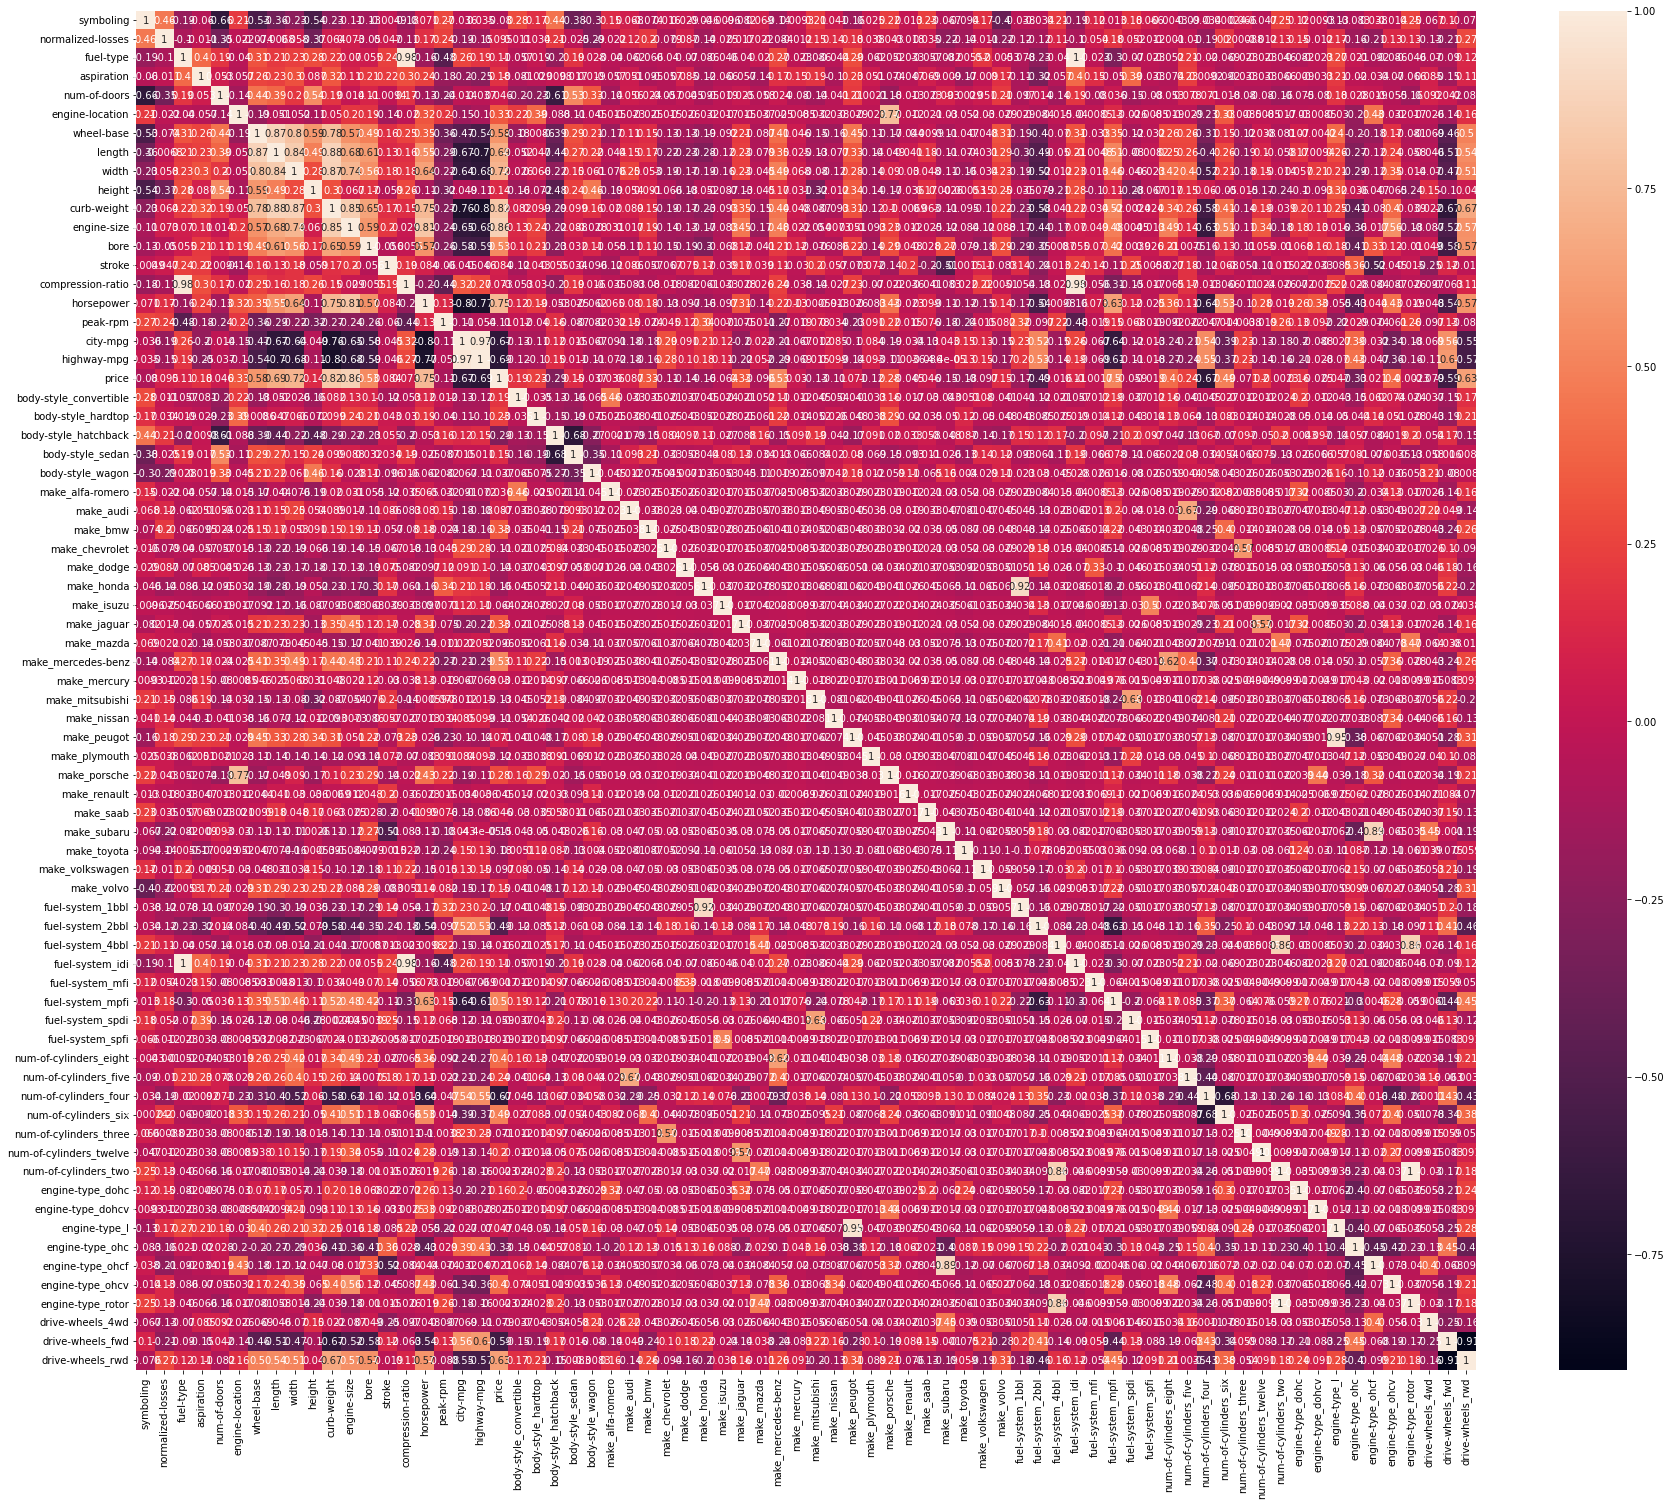

In [97]:
# Linearity
plt.figure(figsize=(30,25))
sns.heatmap(df.corr(),annot=True)

In [89]:
x=df.drop("price" ,axis=1)  # independent variable
y=df["price"]  # dependent variable

In [90]:
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2,random_state=10)

In [91]:
linear_model=LinearRegression()
linear_model.fit(x_train, y_train)

LinearRegression()

# Evaluation

In [92]:
y_pred_train = linear_model.predict(x_train)

In [94]:
# training

mse=mean_squared_error(y_train , y_pred_train)
print("Mean squared error: ",mse)

rmse=np.sqrt(mse)
print("Root mean squared error:",rmse)

mae=mean_absolute_error(y_train , y_pred_train)
print("Mean Absolute error:",mae)

r2_value=r2_score(y_train , y_pred_train)
print("R-squared value:",r2_value)

R2_value=linear_model.score(x_train,y_train)
print("R_squared value:",R2_value)

Mean squared error:  2605545.1017920384
Root mean squared error: 1614.1700969204078
Mean Absolute error: 1154.5596682631972
R-squared value: 0.9606053736203456
R_squared value: 0.9606053736203456


In [95]:
# testing

y_pred_test=linear_model.predict(x_test)

mse=mean_squared_error(y_test, y_pred_test)
print("mean squared error:",mse)

rmse=np.sqrt(mse)
print("Root mean squared error:",rmse)

mae=mean_absolute_error(y_test , y_pred_test)
print("mean absolute error:",mae)

r2_value=r2_score(y_test , y_pred_test)
print("R-squared value:",r2_value)

R2_value=linear_model.score(x_test,y_test)
print("R-squared value:",R2_value)

mean squared error: 18423806.101731323
Root mean squared error: 4292.29613397437
mean absolute error: 2546.7992245710348
R-squared value: 0.5837631304995452
R-squared value: 0.5837631304995452


In [ ]:
#   overfitting
Training  = 0.96
Testing = 0.58